**STROKE**

* A stroke occurs when the blood supply to a part of the brain is interrupted or reduced, preventing brain tissue from receiving necessary oxygen and nutrients.

* Brain cells begin to die within minutes, which can lead to severe complications or even death if not treated promptly. Strokes are one of the leading causes of death and disability worldwide.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data science/4-prjct/04-ML/strok data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


* id
* gender
* age
* hypertension
* heart_disease
* ever_married
* work type
* residence type
* avg glucose
* bmi
* smoking status
* stroke

In [4]:
df.shape

(5110, 12)

# **DATA ANALYS**

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [10]:
#null fixing
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [11]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [12]:
df.duplicated().sum()

0

In [13]:
columns = df.columns
columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
for i in columns :
  print(df[i].value_counts())
  print()

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

hypertension
0    4612
1     498
Name: count, dtype: int64

heart_disease
0    4834
1     276
Name: count, dtype: int64

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Leng

In [15]:
for i in columns :
  print(df[i].unique())
  print()

[ 9046 51676 31112 ... 19723 37544 44679]

['Male' 'Female' 'Other']

[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01

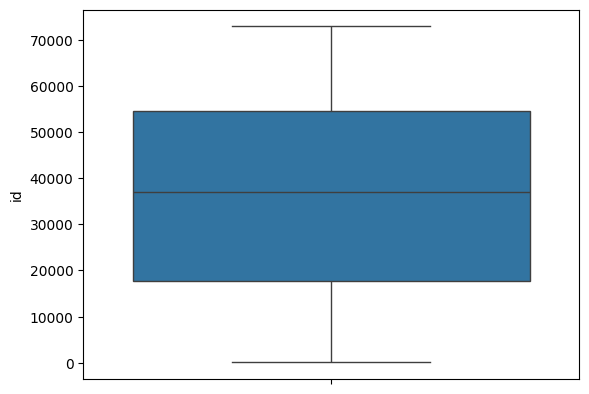

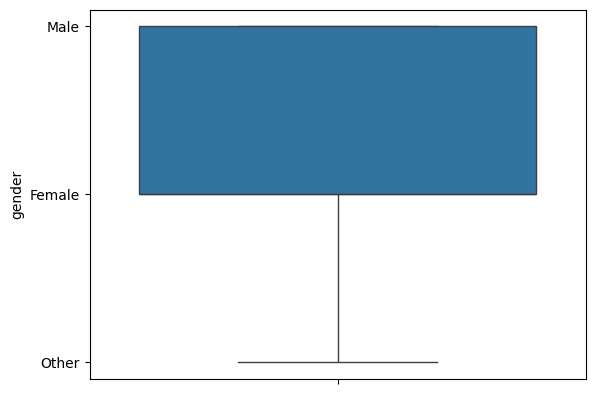

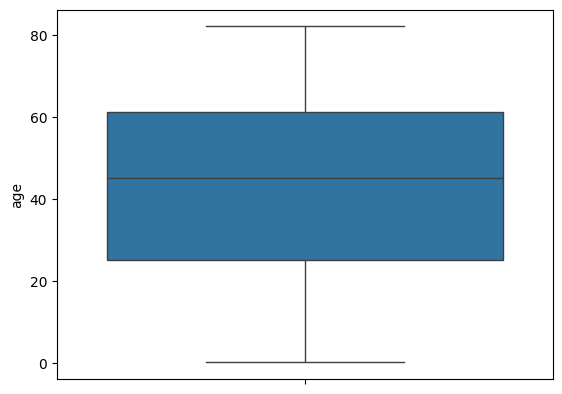

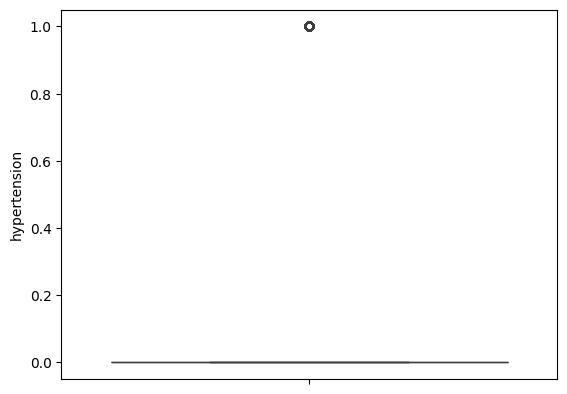

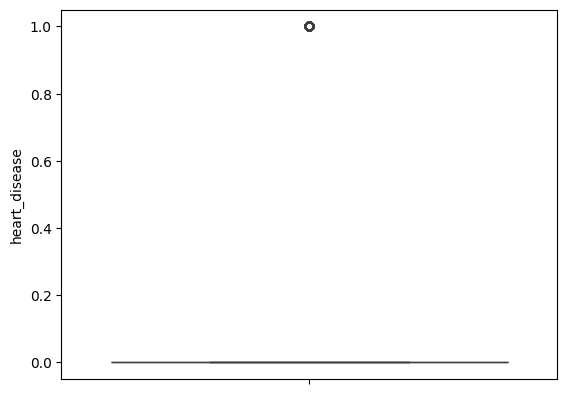

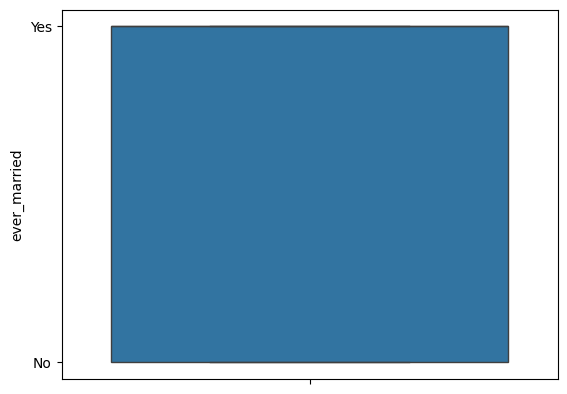

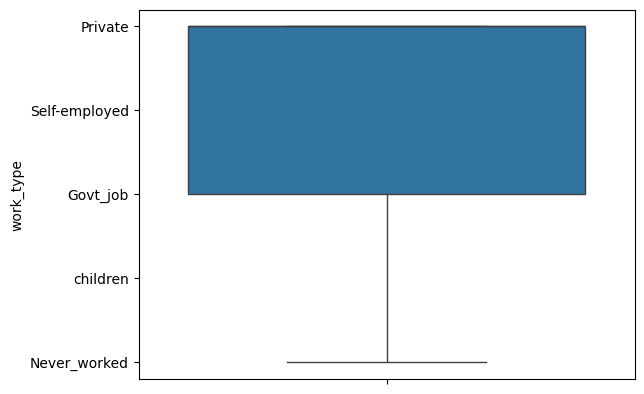

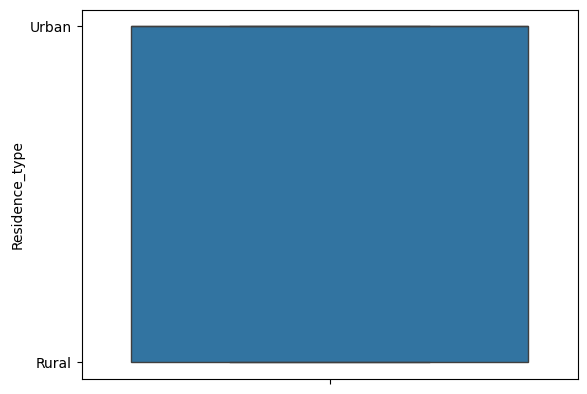

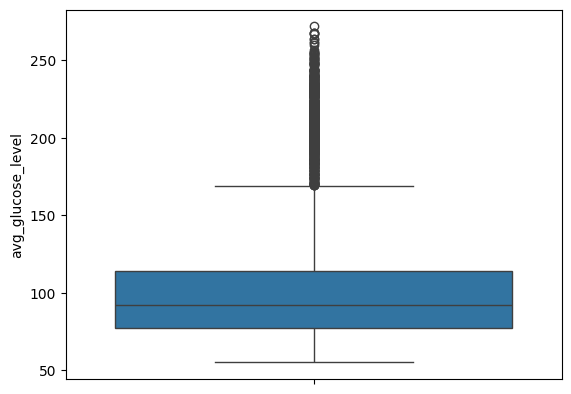

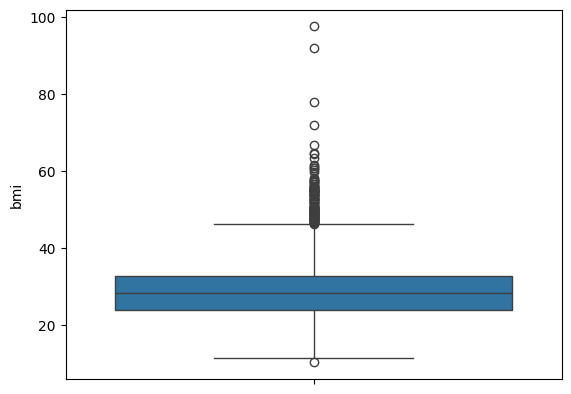

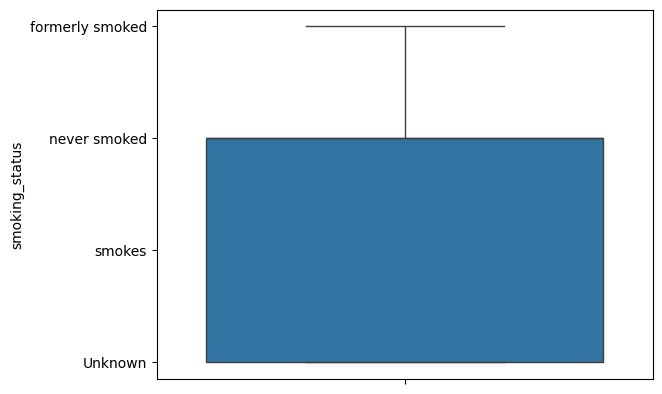

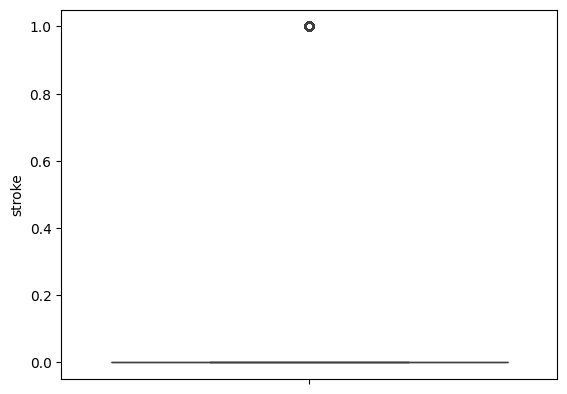

In [16]:
 #outliers
import seaborn as sns
import matplotlib.pyplot as plt
for i in columns:
  sns.boxplot(df[i])
  plt.show()

# **VISUALISATION**

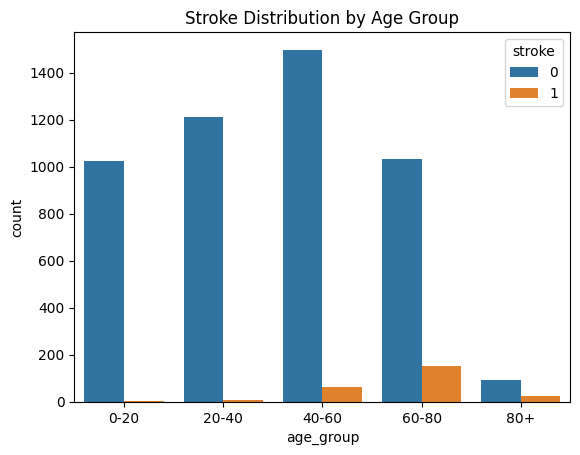

In [17]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80+'])
sns.countplot(x='age_group', hue='stroke', data=df)
plt.title('Stroke Distribution by Age Group')
plt.show()

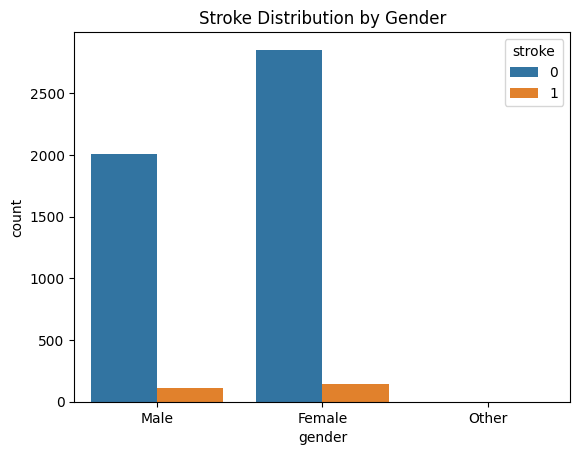

In [18]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Distribution by Gender')
plt.show()

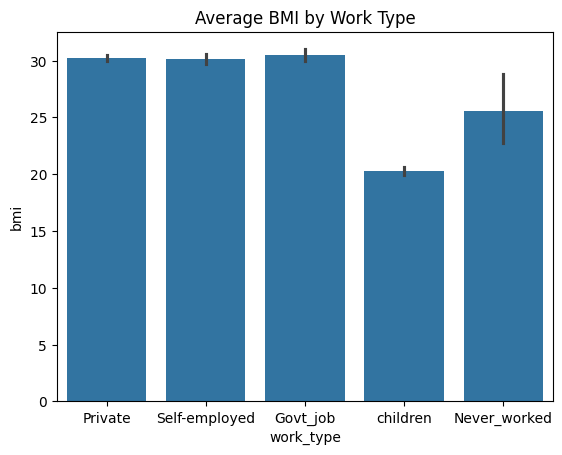

In [19]:
sns.barplot(x='work_type', y='bmi', data=df)
plt.title('Average BMI by Work Type')
plt.show()

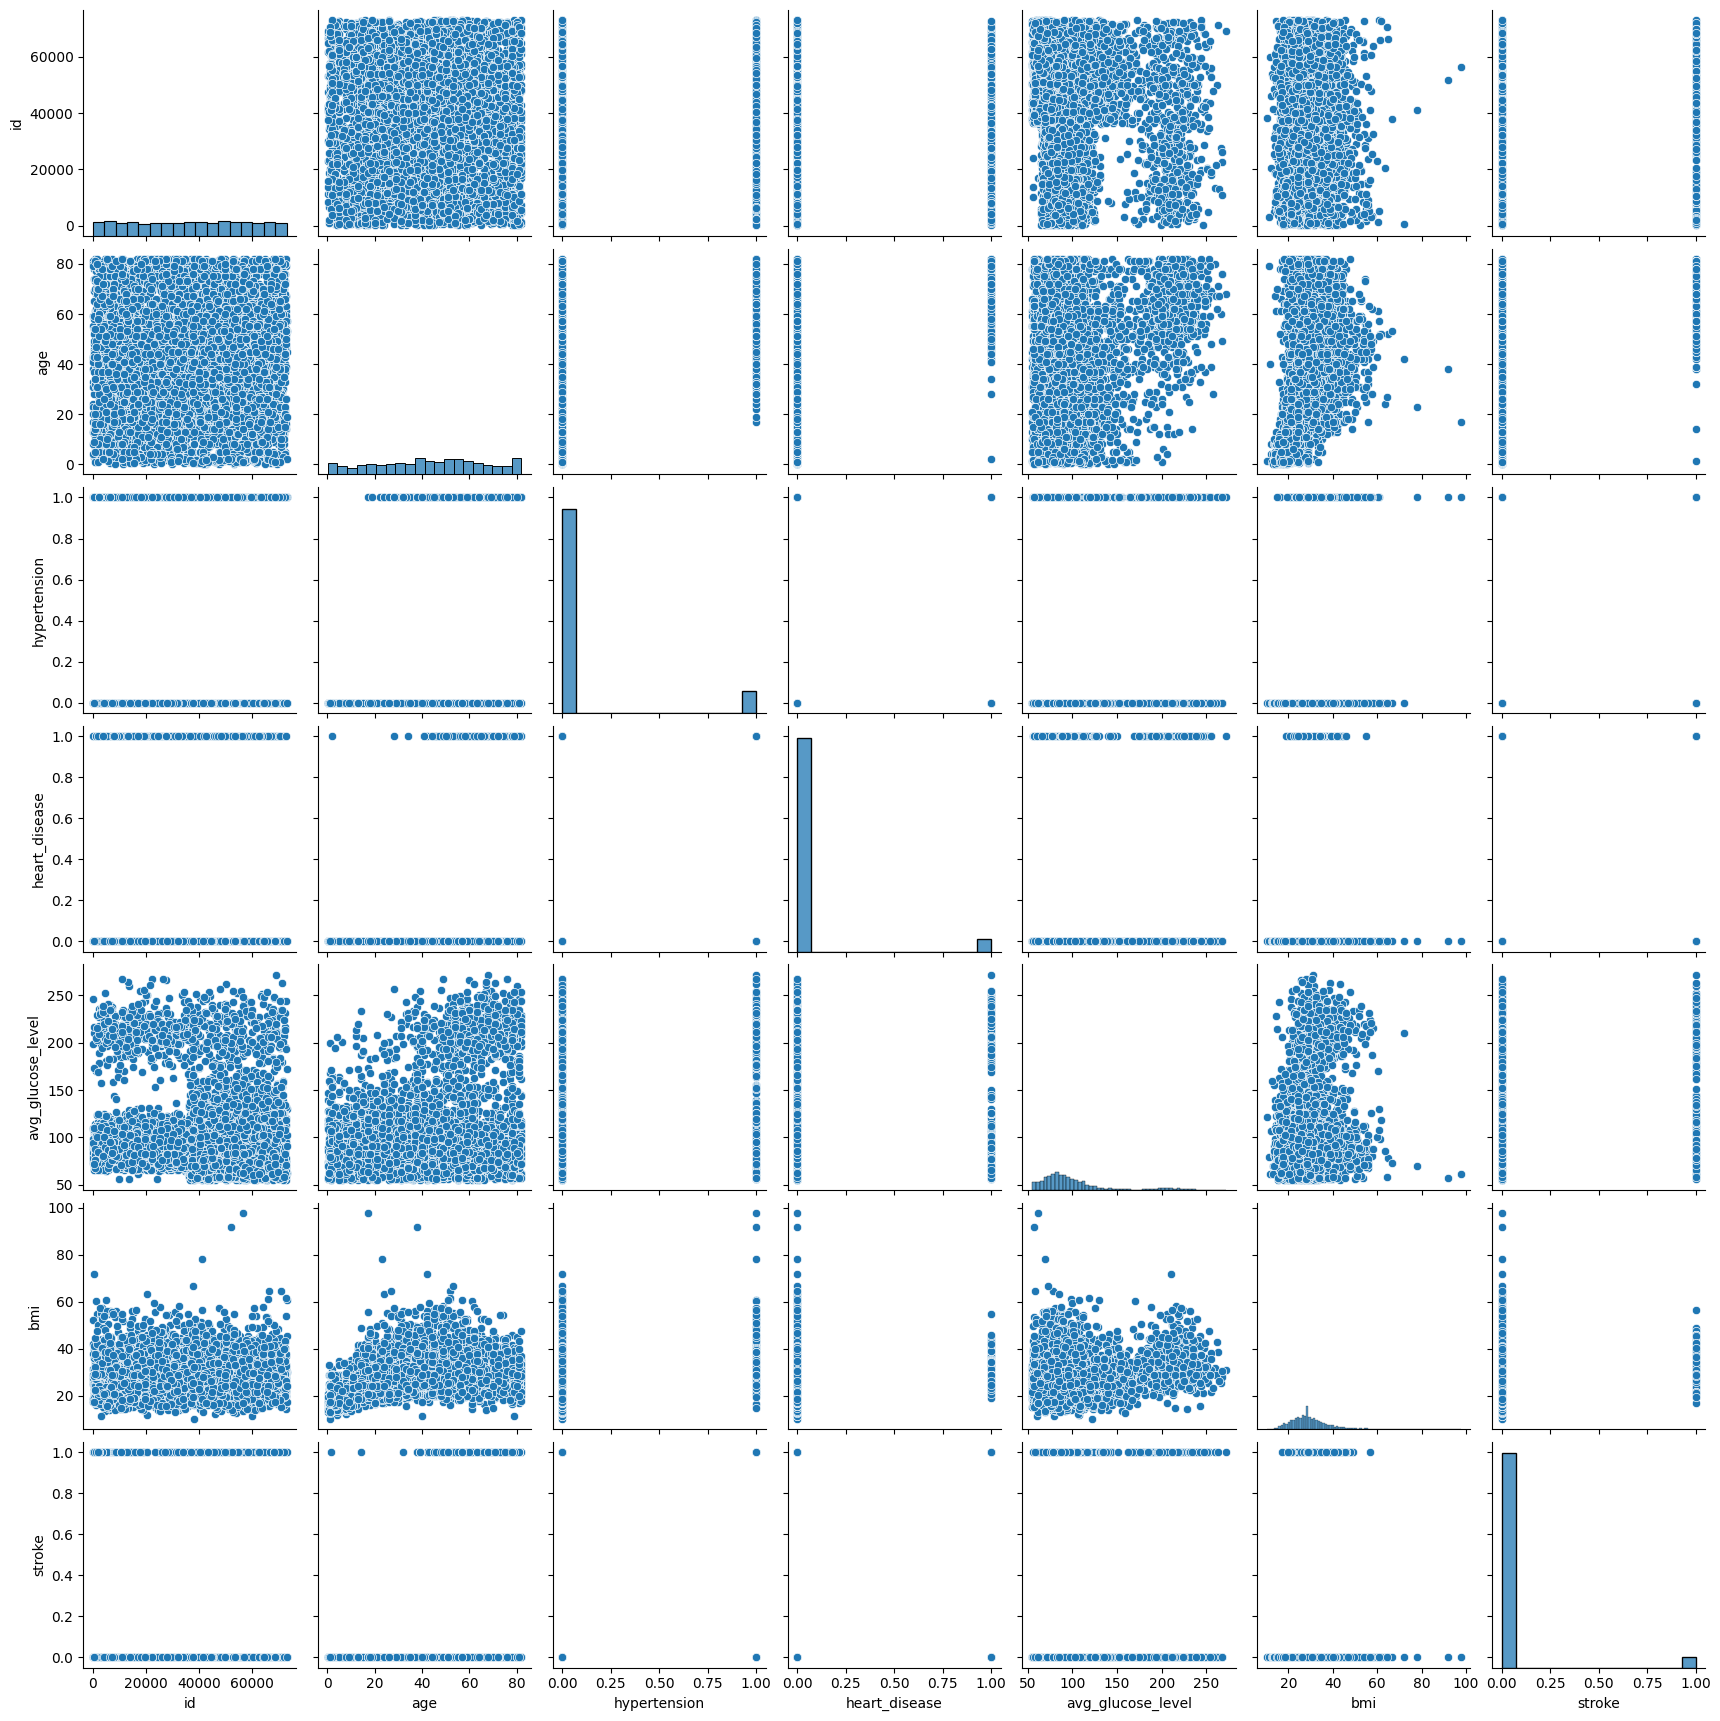

In [20]:
sns.pairplot(df)
plt.show()

# **LABELENCODING**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  age_group          5110 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 484.4+ KB


In [22]:
le1 = LabelEncoder()
df['gender'] = le1.fit_transform(df['gender'])

In [23]:
le2 = LabelEncoder()
df['ever_married'] = le2.fit_transform(df['ever_married'])

In [24]:
le3 = LabelEncoder()
df['work_type'] = le3.fit_transform(df['work_type'])

In [25]:
le4 = LabelEncoder()
df['Residence_type'] = le4.fit_transform(df['Residence_type'])

In [26]:
le5 = LabelEncoder()
df['smoking_status'] = le5.fit_transform(df['smoking_status'])

In [27]:
le6 = LabelEncoder()
df['age_group'] = le6.fit_transform(df['age_group'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 519.1 KB


In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,3
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,3
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,3
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,2
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,3


In [30]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0,3
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,4
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,1
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,2
5109,44679,0,44.0,0,0,1,0,1,85.28,26.200000,0,0,2


In [31]:
corr = df.corr()['stroke']
corr

,stroke
id,0.006388
gender,0.008929
age,0.245257
hypertension,0.127904
heart_disease,0.134914
ever_married,0.108340
work_type,-0.032316
Residence_type,0.015458
avg_glucose_level,0.131945
bmi,0.038947


# **SPLITTING**

In [32]:
x = df.drop('stroke',axis=1)
y = df['stroke']


In [33]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_group
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,3
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,3
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,3
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,2
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,3
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,4
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,1
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,2


In [34]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
y_train.value_counts()

,count
stroke,
0,3893
1,195


# **SMOTE**

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [38]:
y_train_sm.value_counts()

,count
stroke,
0,3893
1,3893


# **STANDARDIZATION**

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train_sm = sc.fit_transform(x_train_sm)





# **MODLES**

# **KNN**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9471624266144814

In [43]:
train_score_knn = knn.score(x_train,y_train)
train_score_knn

0.9525440313111546

In [44]:
test_score_knn = knn.score(x_test,y_test)
test_score_knn

0.9471624266144814

In [45]:
class_report_knn = classification_report(y_test, y_pred_knn)
print(class_report_knn)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.50      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



# **KNN WITH SMOTE DATA**

In [46]:
knn_sm = KNeighborsClassifier(n_neighbors=7)
knn_sm.fit(x_train_sm,y_train_sm)
y_pred_knn_sm = knn_sm.predict(x_test)
y_pred_knn_sm

array([1, 0, 0, ..., 1, 1, 0])

In [47]:
accuracy_knn_sm = accuracy_score(y_test, y_pred_knn_sm)
accuracy_knn_sm

0.6604696673189824

In [48]:
train_score_knn_sm = knn_sm.score(x_train,y_train)
train_score_knn_sm

0.7159980430528375

In [49]:
test_score_knn_sm = knn_sm.score(x_test,y_test)
test_score_knn_sm

0.6604696673189824

In [50]:
class_report_knn_sm = classification_report(y_test, y_pred_knn_sm)
print(class_report_knn_sm)

              precision    recall  f1-score   support

           0       0.95      0.67      0.79       968
           1       0.07      0.43      0.12        54

    accuracy                           0.66      1022
   macro avg       0.51      0.55      0.45      1022
weighted avg       0.91      0.66      0.75      1022



# **DECISION TREE**

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([1, 0, 0, ..., 1, 0, 0])

In [52]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.913894324853229

In [53]:
train_score_dt = dt.score(x_train,y_train)
train_score_dt

1.0

In [54]:
test_score_dt = dt.score(x_test,y_test)
test_score_dt

0.913894324853229

In [55]:
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       968
           1       0.15      0.13      0.14        54

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.55      1022
weighted avg       0.91      0.91      0.91      1022



# **DECISION TREE WITH SMOTE**

In [56]:
dt_sm = DecisionTreeClassifier()
dt_sm.fit(x_train_sm,y_train_sm)
y_pred_dt_sm = dt_sm.predict(x_test)
y_pred_dt_sm

array([1, 0, 1, ..., 1, 0, 1])

In [57]:
accuracy_dt_sm = accuracy_score(y_test, y_pred_dt_sm)
accuracy_dt_sm

0.5371819960861057

In [58]:
test_score_dt_sm = dt_sm.score(x_test,y_test)
test_score_dt_sm

0.5371819960861057

In [59]:
train_score_dt_sm = dt_sm.score(x_train_sm,y_train_sm)
train_score_dt_sm

1.0

In [60]:
class_report_sm = classification_report(y_test, y_pred_dt_sm)
print(class_report_sm)

              precision    recall  f1-score   support

           0       0.94      0.54      0.69       968
           1       0.05      0.43      0.09        54

    accuracy                           0.54      1022
   macro avg       0.50      0.48      0.39      1022
weighted avg       0.90      0.54      0.66      1022



# **NAIVE BAYES-GUASSIAN**






In [61]:
from sklearn.naive_bayes import GaussianNB
ng = GaussianNB()
ng.fit(x_train,y_train)
y_pred_naive = ng.predict(x_test)
y_pred_naive

array([1, 0, 0, ..., 0, 1, 0])

In [62]:
accuracy_naive_gaussian = accuracy_score(y_test, y_pred_naive)
accuracy_naive_gaussian

0.8708414872798435

In [63]:
test_score_naive_gaussian = ng.score(x_test,y_test)
test_score_naive_gaussian

0.8708414872798435

In [64]:
train_score_naive_gaussian = ng.score(x_train,y_train)
train_score_naive_gaussian

0.8598336594911937

In [65]:
class_report_naive_gaussian = classification_report(y_test, y_pred_naive)
print(class_report_naive_gaussian)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       968
           1       0.20      0.46      0.27        54

    accuracy                           0.87      1022
   macro avg       0.58      0.68      0.60      1022
weighted avg       0.93      0.87      0.89      1022



# **NAIVE BAYES-GUASSIAN(SMOTE)**

In [66]:
ng_sm = GaussianNB()
ng_sm.fit(x_train_sm,y_train_sm)
y_pred_naive_smote = ng_sm.predict(x_test)
y_pred_naive_smote

array([0, 0, 1, ..., 1, 1, 0])

In [67]:
accuracy_naive_gaussian_sm = accuracy_score(y_test, y_pred_naive_smote)
accuracy_naive_gaussian_sm

0.525440313111546

In [68]:
test_score_naive_gaussian_sm = ng_sm.score(x_test,y_test)
test_score_naive_gaussian_sm

0.525440313111546

In [69]:
train_score_naive_gaussian_sm = ng_sm.score(x_train_sm,y_train_sm)
train_score_naive_gaussian_sm

0.8101721037760082

In [70]:
class_report_naive_gaussian_sm = classification_report(y_test, y_pred_naive_smote)
print(class_report_naive_gaussian_sm)

              precision    recall  f1-score   support

           0       0.98      0.51      0.67       968
           1       0.08      0.78      0.15        54

    accuracy                           0.53      1022
   macro avg       0.53      0.64      0.41      1022
weighted avg       0.93      0.53      0.64      1022



# **NAIVE BAYES-BERNOULLI**

In [71]:
from sklearn.naive_bayes import BernoulliNB
nb_b = BernoulliNB()
nb_b.fit(x_train,y_train)
y_pred_naive_bernoulli = nb_b.predict(x_test)
y_pred_naive_bernoulli

array([1, 0, 0, ..., 0, 0, 0])

In [72]:
accuracy_naive_bernoulli = accuracy_score(y_test, y_pred_naive_bernoulli)
accuracy_naive_bernoulli

0.9295499021526419

In [73]:
test_score_naive_bernoulli = nb_b.score(x_test,y_test)
test_score_naive_bernoulli

0.9295499021526419

In [74]:
train_score_naive_bernoulli = nb_b.score(x_train,y_train)
train_score_naive_bernoulli

0.9376223091976517

In [75]:
class_report_naive_bernoulli = classification_report(y_test, y_pred_naive_bernoulli)
print(class_report_naive_bernoulli)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       968
           1       0.20      0.11      0.14        54

    accuracy                           0.93      1022
   macro avg       0.58      0.54      0.55      1022
weighted avg       0.91      0.93      0.92      1022



# **NAIVE BAYES-BERNOULLI(SMOTE)**

In [76]:
nb_b_sm = BernoulliNB()
nb_b_sm.fit(x_train_sm,y_train_sm)
y_pred_naive_bernoulli_sm = nb_b_sm.predict(x_test)
y_pred_naive_bernoulli_sm

array([1, 0, 1, ..., 1, 1, 0])

In [77]:
accuracy_naive_bernoulli_sm = accuracy_score(y_test, y_pred_naive_bernoulli_sm)
accuracy_naive_bernoulli_sm

0.5283757338551859

In [78]:
test_score_naive_bernoulli_sm = nb_b_sm.score(x_test,y_test)
test_score_naive_bernoulli_sm

0.5283757338551859

In [79]:
train_score_naive_bernoulli_sm = nb_b_sm.score(x_train_sm,y_train_sm)
train_score_naive_bernoulli_sm

0.7830721808374005

In [80]:
class_report_naive_bernoulli_sm = classification_report(y_test, y_pred_naive_bernoulli_sm)
print(class_report_naive_bernoulli_sm)

              precision    recall  f1-score   support

           0       0.99      0.51      0.67       968
           1       0.09      0.91      0.17        54

    accuracy                           0.53      1022
   macro avg       0.54      0.71      0.42      1022
weighted avg       0.94      0.53      0.64      1022



# **SVM MODEL(LINEAR)**

In [81]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
y_pred_svm = svc.predict(x_test)
y_pred_svm


array([0, 0, 0, ..., 0, 0, 0])

In [82]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.9471624266144814

In [83]:
test_score_svm = svc.score(x_test,y_test)
test_score_svm

0.9471624266144814

In [84]:
train_score_svm = svc.score(x_train,y_train)
train_score_svm

0.9522994129158513

In [85]:
class_report_svm = classification_report(y_test, y_pred_svm)
print(class_report_svm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **SVM MODEL(LINEAR)(smote)**

In [86]:
svc_sm = SVC(kernel="linear")
svc_sm.fit(x_train_sm,y_train_sm)
y_pred_svm_sm = svc_sm.predict(x_test)
y_pred_svm_sm

array([1, 0, 1, ..., 1, 1, 1])

In [87]:
accuracy_svm_sm = accuracy_score(y_test, y_pred_svm_sm)
accuracy_svm_sm

0.5812133072407045

In [88]:
test_score_svm_sm = svc_sm.score(x_test,y_test)
test_score_svm_sm

0.5812133072407045

In [89]:
train_score_svm_sm = svc_sm.score(x_train_sm,y_train_sm)
train_score_svm_sm

0.8463909581299769

In [90]:
class_report_svm_sm = classification_report(y_test, y_pred_svm_sm)
print(class_report_svm_sm)

              precision    recall  f1-score   support

           0       0.99      0.56      0.72       968
           1       0.10      0.89      0.18        54

    accuracy                           0.58      1022
   macro avg       0.55      0.73      0.45      1022
weighted avg       0.94      0.58      0.69      1022



# **SVM(POLY)**

In [91]:
from sklearn.svm import SVC
svc_poly = SVC(kernel="poly")
svc_poly.fit(x_train,y_train)
y_pred_svm_poly = svc_poly.predict(x_test)
y_pred_svm_poly

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)
accuracy_svm_poly

0.9461839530332681

In [93]:
test_score_svm_poly = svc_poly.score(x_test,y_test)
test_score_svm_poly

0.9461839530332681

In [94]:
train_score_svm_poly = svc_poly.score(x_train,y_train)
train_score_svm_poly

0.9535225048923679

In [95]:
class_report_svm_poly = classification_report(y_test, y_pred_svm_poly)
print(class_report_svm_poly)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



# **SVM(POLY)(smote)**

In [96]:
svc_poly_sm = SVC(kernel="poly")
svc_poly_sm.fit(x_train_sm,y_train_sm)
y_pred_svm_poly_sm = svc_poly_sm.predict(x_test)
y_pred_svm_poly_sm

array([1, 0, 1, ..., 1, 1, 0])

In [97]:
accuracy_svm_poly_sm = accuracy_score(y_test, y_pred_svm_poly_sm)
accuracy_svm_poly_sm

0.5675146771037182

In [98]:
test_score_svm_poly_sm = svc_poly_sm.score(x_test,y_test)
test_score_svm_poly_sm

0.5675146771037182

In [99]:
train_score_svm_poly_sm = svc_poly_sm.score(x_train_sm,y_train_sm)
train_score_svm_poly_sm

0.8890315951708194

In [100]:
class_report_svm_poly_sm = classification_report(y_test, y_pred_svm_poly_sm)
print(class_report_svm_poly_sm)

              precision    recall  f1-score   support

           0       0.98      0.55      0.71       968
           1       0.09      0.80      0.16        54

    accuracy                           0.57      1022
   macro avg       0.54      0.68      0.44      1022
weighted avg       0.93      0.57      0.68      1022



# **SVM(SIGMOID)**

In [101]:
svc_sigmoid = SVC(kernel="sigmoid")
svc_sigmoid.fit(x_train,y_train)
y_pred_svm_sigmoid = svc_sigmoid.predict(x_test)
y_pred_svm_sigmoid

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
accuracy_svm_sigmoid = accuracy_score(y_test, y_pred_svm_sigmoid)
accuracy_svm_sigmoid

0.9305283757338552

In [103]:
test_score_svm_sigmoid = svc_sigmoid.score(x_test,y_test)
test_score_svm_sigmoid

0.9305283757338552

In [104]:
train_score_svm_sigmoid = svc_sigmoid.score(x_train,y_train)
train_score_svm_sigmoid

0.9219667318982387

In [105]:
class_report_svm_sigmoid = classification_report(y_test, y_pred_svm_sigmoid)
print(class_report_svm_sigmoid)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       968
           1       0.16      0.07      0.10        54

    accuracy                           0.93      1022
   macro avg       0.55      0.53      0.53      1022
weighted avg       0.91      0.93      0.92      1022



# **SVM(SIGMOID)(smote)**

In [106]:
svc_sigmoid_sm = SVC(kernel="sigmoid")
svc_sigmoid_sm.fit(x_train_sm,y_train_sm)
y_pred_svm_sigmoid_sm = svc_sigmoid_sm.predict(x_test)
y_pred_svm_sigmoid_sm

array([1, 0, 0, ..., 0, 1, 0])

In [107]:
accuracy_svm_sigmoid_sm = accuracy_score(y_test, y_pred_svm_sigmoid_sm)
accuracy_svm_sigmoid_sm

0.6232876712328768

In [108]:
test_score_svm_sigmoid_sm = svc_sigmoid_sm.score(x_test,y_test)
test_score_svm_sigmoid_sm

0.6232876712328768

In [109]:
train_score_svm_sigmoid_sm = svc_sigmoid_sm.score(x_train_sm,y_train_sm)
train_score_svm_sigmoid_sm

0.7103776008219882

In [110]:
class_report_svm_sigmoid_sm = classification_report(y_test, y_pred_svm_sigmoid_sm)
print(class_report_svm_sigmoid_sm)

              precision    recall  f1-score   support

           0       0.99      0.61      0.75       968
           1       0.11      0.85      0.19        54

    accuracy                           0.62      1022
   macro avg       0.55      0.73      0.47      1022
weighted avg       0.94      0.62      0.72      1022



# **LOGISTIC REGRESSION**

In [111]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
y_pred_lg

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
accuracy_lg = accuracy_score(y_test, y_pred_lg)
accuracy_lg

0.9471624266144814

In [113]:
testing_score_lg = lg.score(x_test,y_test)
testing_score_lg

0.9471624266144814

In [114]:
training_score_lg = lg.score(x_train,y_train)
training_score_lg

0.9522994129158513

In [115]:
class_report_lg = classification_report(y_test, y_pred_lg)
print(class_report_lg)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **LOGISTIC REGRESSION(SMOTE)**

In [116]:
from sklearn.linear_model import LogisticRegression
lg_sm = LogisticRegression()
lg_sm .fit(x_train_sm,y_train_sm)
y_pred_lg_sm  = lg_sm.predict(x_test)
y_pred_lg_sm

array([1, 0, 1, ..., 1, 1, 0])

In [117]:
accuracy_lg_sm = accuracy_score(y_test, y_pred_lg_sm)
accuracy_lg_sm

0.5841487279843445

In [118]:
testing_score_lg_sm = lg_sm.score(x_test,y_test)
testing_score_lg_sm

0.5841487279843445

In [119]:
training_score_lg_sm = lg_sm.score(x_train_sm,y_train_sm)
training_score_lg_sm

0.8476753146673517

In [120]:
class_report_lg_sm = classification_report(y_test, y_pred_lg_sm)
print(class_report_lg_sm)

              precision    recall  f1-score   support

           0       0.99      0.57      0.72       968
           1       0.10      0.85      0.18        54

    accuracy                           0.58      1022
   macro avg       0.54      0.71      0.45      1022
weighted avg       0.94      0.58      0.69      1022



# **ENSEMBLE LEARNING (rndm frst)**

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_rfc

0.9471624266144814

In [123]:
testingscore = rfc.score(x_test,y_test)
testingscore

0.9471624266144814

In [124]:
trainingscore = rfc.score(x_train,y_train)
trainingscore

0.9525440313111546

In [125]:
class_report_rfc = classification_report(y_test, y_pred_rfc)
print(class_report_rfc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ENSEMBLE LEARNING (rndm frst)(smote)**

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc_sm = RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)
rfc_sm.fit(x_train_sm,y_train_sm)
y_pred_rfc_sm = rfc_sm.predict(x_test)
y_pred_rfc_sm

array([1, 0, 1, ..., 1, 1, 0])

In [127]:
accuracy_rfc_sm = accuracy_score(y_test, y_pred_rfc_sm)
accuracy_rfc_sm

0.5704500978473581

In [128]:
testingscore_sm = rfc.score(x_test,y_test)
testingscore_sm

0.9471624266144814

In [129]:
trainingscore_sm = rfc.score(x_train_sm,y_train_sm)
trainingscore_sm

0.5

# **ENSEMBLE LEARNING (ADABOOST)**

In [130]:
import sklearn.ensemble as ensm

In [131]:
adb = ensm.AdaBoostClassifier(n_estimators=10)
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)
y_pred_adb

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
accuracy_ada = accuracy_score(y_test, y_pred_adb)
accuracy_ada

0.9471624266144814

In [133]:
trainingscore_ada = adb.score(x_train,y_train)
trainingscore_ada

0.9522994129158513

In [134]:
testingscore_ada = adb.score(x_test,y_test)
testingscore_ada

0.9471624266144814

# **ENSEMBLE LEARNING (ADABOOST)(smote)**

In [135]:
adb_sm = ensm.AdaBoostClassifier(n_estimators=10)
adb_sm.fit(x_train_sm,y_train_sm)
y_pred_adb_sm = adb_sm.predict(x_test)
y_pred_adb_sm

array([0, 0, 0, ..., 1, 1, 0])

In [136]:
accuracy_ada_sm = accuracy_score(y_test, y_pred_adb_sm)
accuracy_ada_sm

0.6125244618395304

In [137]:
trainingscore_ada_sm = adb_sm.score(x_train_sm,y_train_sm)
trainingscore_ada_sm

0.8374004623683534

In [138]:
testingscore_ada_sm = adb_sm.score(x_test,y_test)
testingscore_ada_sm

0.6125244618395304

 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .
 * .

# **BEST MODEL FINDING**

<ipython-input-139-e681ff6c0dc2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


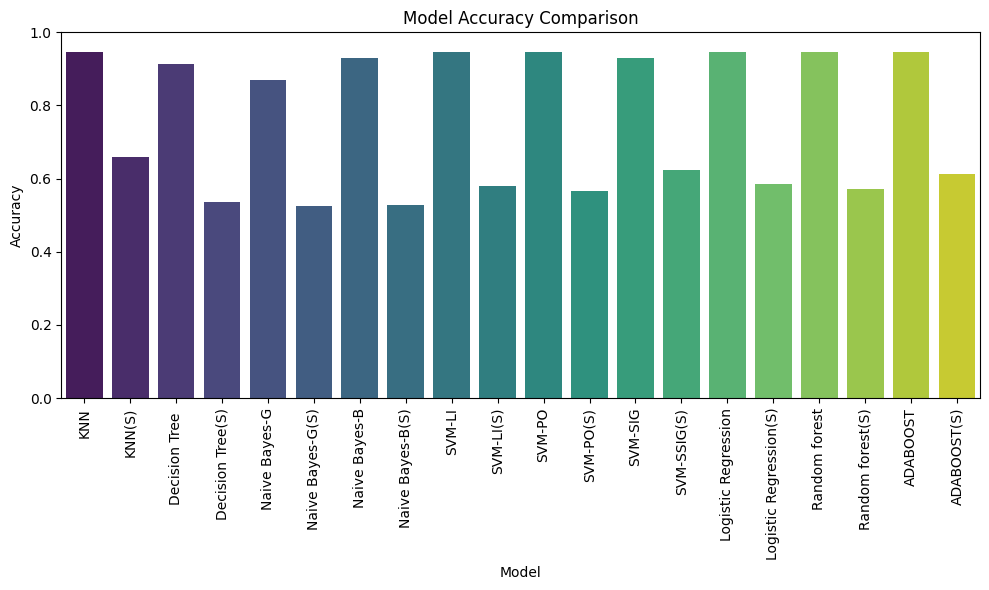

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['KNN','KNN(S)', 'Decision Tree ','Decision Tree(S)','Naive Bayes-G','Naive Bayes-G(S)','Naive Bayes-B','Naive Bayes-B(S)','SVM-LI','SVM-LI(S)','SVM-PO','SVM-PO(S)','SVM-SIG','SVM-SSIG(S)','Logistic Regression','Logistic Regression(S)','Random forest','Random forest(S)','ADABOOST','ADABOOST(S)'] # Added missing 'Logistic Regression(S)'
accuracies = [accuracy_knn,accuracy_knn_sm,accuracy_dt,accuracy_dt_sm,accuracy_naive_gaussian,accuracy_naive_gaussian_sm,accuracy_naive_bernoulli,accuracy_naive_bernoulli_sm,accuracy_svm,accuracy_svm_sm,accuracy_svm_poly,accuracy_svm_poly_sm,accuracy_svm_sigmoid,accuracy_svm_sigmoid_sm,accuracy_lg,accuracy_lg_sm,accuracy_rfc,accuracy_rfc_sm,accuracy_ada,accuracy_ada_sm]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-140-e389e444d764>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


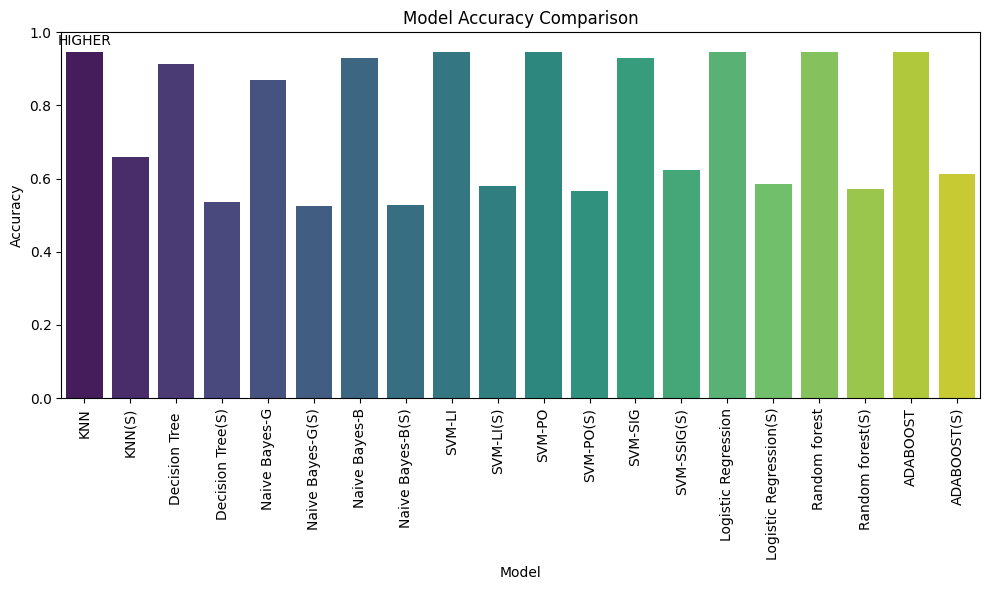

In [140]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.text(x=model_names.index('KNN'), y=accuracies[model_names.index('KNN')] + 0.01, s='HIGHER', ha='center', va='bottom')
plt.tight_layout()
plt.show()


**AS  PER THE BAR PLOT SHOWS THAT THE KNN MODEL HAVE THE BETTER ACCURACY COMPARED TO WHOLE OTHER MODELS**

# **HYPER PARAMETER TUNING-GRID SEARCH**

In [141]:
from sklearn.model_selection import GridSearchCV
cls = knn
cls.fit(x_train,y_train)
y_pred_grid = cls.predict(x_test)
y_pred_grid


array([0, 0, 0, ..., 0, 0, 0])

In [142]:
accuracy_grid = accuracy_score(y_test, y_pred_grid)
accuracy_grid

0.9471624266144814

In [143]:
trainingscore_grid = cls.score(x_train,y_train)
trainingscore_grid

0.9525440313111546

In [144]:
testingscore_grid = cls.score(x_test,y_test)
testingscore_grid

0.9471624266144814

In [145]:
cls1 =  knn()

In [146]:
params = {'kernel':['linear','poly','rbf','sigmoid'],'C':[1,5,10,20]}
clf = GridSearchCV(cls1,params,cv=5)
clf.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [147]:
clf.best_params_

{'C': 20, 'kernel': 'rbf'}

In [148]:
clf2 = knn(kernel='linear',C=20)
clf2.fit(x_train,y_train)
y_pred_grid2 = clf2.predict(x_test)
y_pred_grid2

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
accuracy_grid2 = accuracy_score(y_test, y_pred_grid2)
accuracy_grid2

0.9471624266144814

# **CONCLUSION**

* **BASICALLY THIS DATASET GIVES A HIGH ACCURACY SCORE SO WHEN SAY THAT THIS WAS  
  A GOOTFIT DATASET**

* **BUT, BASED ON THE ACCURACY SCORE EVALUATED BETWEEN ALL THE MODELS AND WITH T
  THIER SMOTE MODEL ,THE KNN MODEL ACHIEVED A GOOD ACCURACY**

* **AS PER THE BAR PLOT SHOWS THAT THE KNN MODEL HAVE THE BETTER
  ACCURACY COMPARED TO WHOLE OTHER MODELS**

# **PREDICTION**

In [150]:
new_dp =  knn.predict(([[1, 60, 120, 25,25,89,35,55,15,14,15,88]]))
new_dp

if new_dp == 1:
  print("THE PATIENT EFFECTED A SEVER STROKE")

else:
  print("THE PATIENT IS FINE , NO WAY FOR AA STROKE ")

THE PATIENT IS FINE , NO WAY FOR AA STROKE 


# STREAMLIT

In [151]:
import pickle
pickle.dump(knn,open('model11.sav','wb'))

In [152]:
import pickle
pickle.dump(sc,open('sc11.sav','wb'))